In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
add=r"C:\Users\matin\Documents\minor project[1]\minor project\INFY Historical Data (2).csv"
infosys_data = pd.read_csv(add, date_parser=True)
print(infosys_data.columns)


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [3]:
infosys_data.rename(columns={'Price': 'Close'}, inplace=True)
def clean_numeric_columns(df, columns):
    for col in columns:
        df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    return df

# Data Conversion and Normalization

In [4]:
# Apply to both datasets
infosys_data = clean_numeric_columns(infosys_data, ['Close', 'Open', 'High', 'Low'])
infosys_data['Date'] = pd.to_datetime(infosys_data['Date'],dayfirst=True)
infosys_data.set_index('Date', inplace=True)
infosys_data=infosys_data.sort_index()
scaler = MinMaxScaler(feature_range=(0, 1))
infosys_scaled = scaler.fit_transform(infosys_data[['Close']])
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        #print(i)
        #print(data[i-time_step:i, 0])
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
        #print(data[i,0])
    return np.array(X), np.array(y)



# Reshape of Dataset

In [5]:
X_infy, y_infy = create_sequences(infosys_scaled,3)
x=X_infy.reshape((X_infy.shape[0],X_infy.shape[1],1))
y=y_infy
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=False,shuffle=False)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import KFold

# Model Building

In [6]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (3, 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 3, 60)               │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 3, 80)               │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 80)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.1591 - mean_absolute_error: 0.3377
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0446 - mean_absolute_error: 0.1776 
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0258 - mean_absolute_error: 0.1312
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0781
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0815 
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0093 - mean_absolute_error: 0.0726
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0095 - mean_absolute_error: 0.0713
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0580
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0079 - mean_absolute_error: 0.0656
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0071 - mean_absolute_error: 0.0648 
Epoch 11/100
28/28 ━━━━━━

In [8]:
def pred(test,model=model,incerse=True):
    #test=test.reshape(len(test),1)
    prediction=model.predict(test)
    if incerse:
        return scaler.inverse_transform(prediction).reshape(-1)
    return prediction.reshape(-1)
pres=pred(x,model=model,incerse=True)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step  


In [9]:
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
y_t=pred(x_test,model,False)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [11]:
(r2_score(y_test,y_t))

0.9481902621652178

In [12]:
res=pd.DataFrame(data={"Date":infosys_data.index[3:],"Price":infosys_data["Close"].values[3:],"pred":pres})

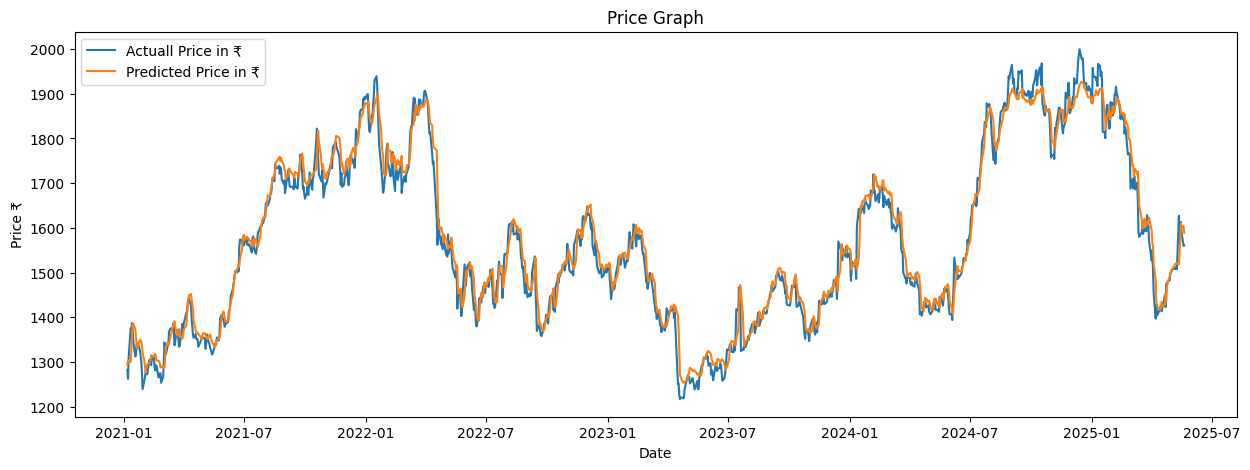

In [13]:
plt.figure(figsize=(15,5))
plt.plot(res['Date'],res['Price'],label='Actuall Price in ₹')
plt.plot(res['Date'],res['pred'],label='Predicted Price in ₹')
plt.title("Price Graph")
plt.xlabel('Date')
plt.ylabel('Price ₹')
plt.legend()
plt.show()

In [14]:
def reshape(x):
    x=x.reshape(1,len(x),1)
    return x


In [15]:
input_=res.loc[len(res)-3:,['Date','Price']].reset_index(drop=True)

In [16]:
def norm(test,n=3,scaler=scaler):
    test=np.array(test).reshape(n,1)
    return scaler.transform(test)

In [17]:
def Output_Gen(input_,n,step=3):
    last=input_.iloc[-1,0]+timedelta(1)
    input=input_.copy()
    print(last)
    for j,i in enumerate(range(n)):
        tes=reshape(norm(input.iloc[i:i+step,1].values))
        print(tes)
        Y=pred(tes)[0]
        print(Y)
        input.loc[j+3]=[last,Y]
        print(last)
        last=last+timedelta(1)
    return input
    

In [18]:
output=Output_Gen(input_,7)

2025-05-21 00:00:00
[[[0.47673528]
  [0.43830124]
  [0.43932274]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1576.953
2025-05-21 00:00:00
[[[0.43830124]
  [0.43932274]
  [0.46020354]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1576.713
2025-05-22 00:00:00
[[[0.43932274]
  [0.46020354]
  [0.4598971 ]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1580.9381
2025-05-23 00:00:00
[[[0.46020354]
  [0.4598971 ]
  [0.46529204]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1588.0923
2025-05-24 00:00:00
[[[0.4598971 ]
  [0.46529204]
  [0.47442705]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1593.1649
2025-05-25 00:00:00
[[[0.46529204]
  [0.47442705]
  [0.48090418]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1598.8298
2025-05-26 00:00:00
[[[0.47442705]
  [0.48090418]
  [0.48813759]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1605.3262
2025-05-27 00:00:00


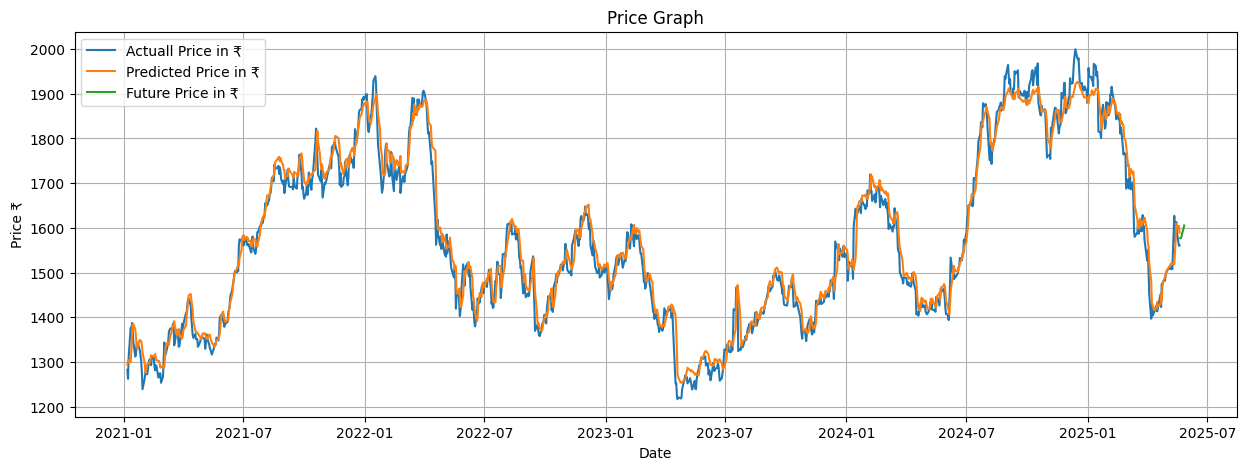

In [19]:
plt.figure(figsize=(15,5))
plt.plot(res['Date'],res['Price'],label='Actuall Price in ₹')
plt.plot(res['Date'],res['pred'],label='Predicted Price in ₹')
plt.plot(output.loc[3:,'Date'],output.loc[3:,'Price'],label='Future Price in ₹')
plt.title("Price Graph")
plt.xlabel('Date')
plt.ylabel('Price ₹')
plt.legend()
plt.grid(True)
plt.show()